[[ 0.60094995 -0.9296693 ]
 [-1.12622403  1.39785432]
 [ 0.97712745  1.2171575 ]
 [-1.08782377 -0.7967181 ]
 [ 0.86504751  0.55927881]
 [ 0.75320411 -1.16772155]
 [-0.97345579  0.92873287]
 [-1.1301717   0.71545897]
 [-1.35616963  1.3143423 ]
 [ 1.01549712  0.86869822]
 [ 0.70676689 -1.05593439]
 [-1.05937388 -0.46689793]
 [-0.97315134  0.60252157]
 [ 1.11087182 -0.30260987]
 [-0.61412106 -0.87862809]
 [ 0.97049407  1.42981914]
 [-0.81089842 -1.19979988]
 [ 0.57459367  0.92232538]
 [-0.94521226 -0.16240093]
 [ 0.93906143 -0.98855041]]
[2 3 0 1 0 2 3 3 3 0 2 1 3 2 1 0 1 0 1 2]
[[ 0.60094995 -0.9296693 ]
 [-1.12622403  1.39785432]
 [ 0.97712745  1.2171575 ]
 [-1.08782377 -0.7967181 ]
 [ 0.86504751  0.55927881]
 [ 0.75320411 -1.16772155]
 [-0.97345579  0.92873287]
 [-1.1301717   0.71545897]
 [-1.35616963  1.3143423 ]
 [ 1.01549712  0.86869822]
 [ 0.70676689 -1.05593439]
 [-1.05937388 -0.46689793]
 [-0.97315134  0.60252157]
 [ 1.11087182 -0.30260987]
 [-0.61412106 -0.87862809]
 [ 0.9704940

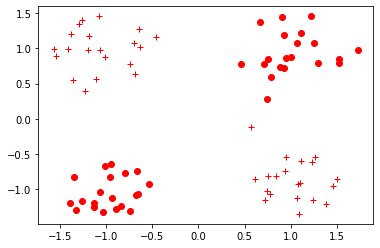

tensor([[ 0.6009, -0.9297],
        [-1.1262,  1.3979],
        [ 0.9771,  1.2172],
        [-1.0878, -0.7967],
        [ 0.8650,  0.5593],
        [ 0.7532, -1.1677],
        [-0.9735,  0.9287],
        [-1.1302,  0.7155],
        [-1.3562,  1.3143],
        [ 1.0155,  0.8687],
        [ 0.7068, -1.0559],
        [-1.0594, -0.4669],
        [-0.9732,  0.6025],
        [ 1.1109, -0.3026],
        [-0.6141, -0.8786],
        [ 0.9705,  1.4298],
        [-0.8109, -1.1998],
        [ 0.5746,  0.9223],
        [-0.9452, -0.1624],
        [ 0.9391, -0.9886]])
tensor([1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 1.])
Before Training, test loss is 0.6875295639038086
벡터 [-1,1]이 레이블 1을 가질 확률은 0.483304500579834
Train loss at 0 is 0.6867817044258118
Train loss at 100 is 0.6528397798538208
Train loss at 200 is 0.5928797721862793
Train loss at 300 is 0.4917827248573303
Train loss at 400 is 0.36840203404426575
Train loss at 500 is 0.26221534609794617
Train loss

In [21]:
# 좌표의 정답을 찾는 인공신경망

import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_dim = 2     #디멘션 2차원
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,           # 학습에 쓰이는 데이터 x_train, 레이블 y_train 즉 y_train에는 x_train의 데이터가 레이블이 0과 1어디인지 적어놓은 데이터다
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,             # 위와 마찬가지로 레이블 즉 답지를 적어 놓은 데이터를 말함.
                            centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)


def label_map(y_, from_, to_):                                          # 
  y = numpy.copy(y_)
  for f in from_:
    y[y_ == f] = to_
  return y

print(x_test)
print(y_test)

y_train = label_map(y_train, [0,1], 0)      # y_train의 레이블 된 데이터들을 0, 1은 무조건 0으로 2, 3은 1로 다시 y_train 지정
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

print(x_test)
print(y_test)


def vis_data(x,y = None, c = 'r'):          # 그래프로 보여주려고 하는 함수
  if y is None:
    y = [None] * len(x)
  for x_, y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
    else:
      plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

x_train = torch.FloatTensor(x_train)        # numpy를 pytorch로 바꿈
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

print(x_test)
print(y_test)



class NeuralNet(torch.nn.Module):               # 학습모델 생성(신경망모델) (input_size 데이터의 차원)
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()           # 생성자
    self.input_size = input_size
    self.hidden_size = hidden_size

    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)      # 들어오는 데이터에 선형 변환을 적용(input_size를 입력받아서 hidden_size만큼의 중간층 노드를 만듬) y=Ax+b를 변환한다. 정의
    self.relu = torch.nn.ReLU()                                             # 활성화 함수 입력값이 0보다 크면 그대로 출력 0이하면 0 정의
    self.linear_2 = torch.nn.Linear(self.hidden_size, 1)                    # 
    self.sigmoid = torch.nn.Sigmoid()                                       # 일정 값을 기준으로 0인지 1인지구분함으로써 분류하는 방식(0과 1사이의 값을 반환하는 활성화 함수)

  def forward(self, input_tensor):              # 순전파
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)
    return output

model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

model.eval()  #평가모드
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(model(torch.FloatTensor([-1,1])).item()))

for epoch in range(epochs):
  model.train()  #학습모드
  optimizer.zero_grad()                                 # 경사값 0으로 설정
  train_output = model(x_train)                         # 훈련데이터 입력
  train_loss = criterion(train_output.squeeze(), y_train) # 손실 계산
  if epoch % 100 == 0:                                  # 100번마다 오차 주는지 
    print('Train loss at {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward()                                 # 오차함수를 가중치로 미분하여 오차가 최소가 되는 방향을 구하고       [역전파를 행하는 코드]
  optimizer.step()                                      # 그 방향으로 모델을 학습률만큼 이동시킴

model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))